In [1]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import MaxPooling2D,Conv2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

import pandas as pd              
import numpy as np 

data = pd.read_csv("bible_data_set (with count and testament).csv")
data

,citation,book,chapter,verse,text,length (charcters),words,testament
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...,56,10,old
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and ...",144,29,old
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there wa...",56,11,old
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and G...",87,17,old
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness...",117,22,old
...,...,...,...,...,...,...,...,...
31097,Revelation 22:17,Revelation,22,17,"And the Spirit and the bride say, Come. And le...",170,33,new
31098,Revelation 22:18,Revelation,22,18,For I testify unto every man that heareth the ...,189,37,new
31099,Revelation 22:19,Revelation,22,19,And if any man shall take away from the words ...,209,44,new
31100,Revelation 22:20,Revelation,22,20,"He which testifieth these things saith, Surely...",97,16,new


In [2]:
import nltk
from nltk.stem import PorterStemmer

ps = PorterStemmer() 

vocabulary_size = 0
word2location = {}

def prepare_vocabulary(data):
    index = 0
    for sentance in data['text']:
        #sentance = sentance.lower()
        words = nltk.word_tokenize(sentance)
        for word in words:
            stemed_word = ps.stem(word)
            if stemed_word not in word2location:
                word2location[stemed_word] = index
                index += 1
    return index

def convert2vec(sentance):
    #sentance = sentance.lower()
    res_vec = np.zeros(vocabulary_size)
    words = nltk.word_tokenize(sentance)
    for word in words:
        stemed_word = ps.stem(word)
        if stemed_word in word2location:
            res_vec[word2location[stemed_word]]+=1
    return res_vec

books = ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges',
            'Ruth', '1 Samuel', '2 Samuel', '1 Kings', '2 Kings', '1 Chronicles', '2 Chronicles',
            'Ezra', 'Nehemiah', 'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes',
            'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel', 'Daniel',
            'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah', 'Nahum', 'Habakkuk',
            'Zephaniah', 'Haggai',    'Zechariah',    'Malachi', 'Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans', '1 Corinthians',
            '2 Corinthians', 'Galatians', 'Ephesians', 'Philippians', 'Colossians',
            '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy', 'Titus', 'Philemon',
            'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude',
            'Revelation']

def encode(line):
    res_vec = np.zeros(66)
    idx = books.index(data.iloc[line]['book'])
    res_vec[idx] = 1
    return res_vec

vocabulary_size = prepare_vocabulary(data)
print("the size of the vocabulary is: ", vocabulary_size)
word2location

the size of the vocabulary is:  9421


{'In': 0,
 'the': 1,
 'begin': 2,
 'god': 3,
 'creat': 4,
 'heaven': 5,
 'and': 6,
 'earth': 7,
 '.': 8,
 'wa': 9,
 'without': 10,
 'form': 11,
 ',': 12,
 'void': 13,
 ';': 14,
 'dark': 15,
 'upon': 16,
 'face': 17,
 'of': 18,
 'deep': 19,
 'spirit': 20,
 'move': 21,
 'water': 22,
 'said': 23,
 'let': 24,
 'there': 25,
 'be': 26,
 'light': 27,
 ':': 28,
 'saw': 29,
 'that': 30,
 'it': 31,
 'good': 32,
 'divid': 33,
 'from': 34,
 'call': 35,
 'day': 36,
 'he': 37,
 'night': 38,
 'even': 39,
 'morn': 40,
 'were': 41,
 'first': 42,
 'a': 43,
 'firmament': 44,
 'in': 45,
 'midst': 46,
 'made': 47,
 'which': 48,
 'under': 49,
 'abov': 50,
 'so': 51,
 'second': 52,
 'gather': 53,
 'togeth': 54,
 'unto': 55,
 'one': 56,
 'place': 57,
 'dri': 58,
 'land': 59,
 'appear': 60,
 'sea': 61,
 'bring': 62,
 'forth': 63,
 'grass': 64,
 'herb': 65,
 'yield': 66,
 'seed': 67,
 'fruit': 68,
 'tree': 69,
 'after': 70,
 'hi': 71,
 'kind': 72,
 'whose': 73,
 'is': 74,
 'itself': 75,
 'brought': 76,
 'third'

In [74]:
import random

rand = []
for r in range (300):
    ra = random.randrange(0, 31101)
    if(ra not in rand):
        rand.append(ra)
            
train_x = []
# train_y = []
test_x = []
# test_y = []
for i in range(len(data['text'])):
    if(i not in rand):
        train_x.append(i)
#         train_y.append(i)
        
    elif(i in rand):
        test_x.append(i)
#         test_y.append(i)

random.shuffle(train_x)
random.shuffle(test_x)

In [75]:
# data_x,test_data_x,data_y,test_data_y = train_test_split(data.text, data.book, test_size=0.1, random_state=37)
data_x = np.array([convert2vec(data.iloc[i]['text']) for i in train_x])
# np.random.shuffle(data_x)
data_y = np.array([encode(i) for i in train_x])
# np.random.shuffle(data_y)
test_data_x = np.array([convert2vec(data.iloc[i]['text']) for i in test_x])
# np.random.shuffle(test_data_x)
test_data_y = np.array([encode(i) for i in test_x])
# np.random.shuffle(test_data_y)

In [86]:
data_x

array([[0., 3., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.]])

In [87]:
data_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
len(test_data_x)

299

In [79]:
len(test_data_y)

299

In [88]:
#lstm,dense,embedding,fully_connected,conv2D
#,kernel_regularizer=regularizers.l2(0.001)
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = vocabulary_size))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(66, activation = 'softmax'))

# model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Embedding(50000, 100, input_length=data_x.shape[1]))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(66, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
opt = SGD(lr=0.01)

In [89]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
history = model.fit(data_x, data_y, epochs=10, batch_size=16,validation_data=(test_data_x,test_data_y),callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.00001)])

Epoch 1/10
1926/1926 [==============================] - 9s 5ms/step - loss: 3.4146 - accuracy: 0.1204 - val_loss: 2.8226 - val_accuracy: 0.2441
Epoch 2/10
1926/1926 [==============================] - 8s 4ms/step - loss: 2.8589 - accuracy: 0.2084 - val_loss: 2.5728 - val_accuracy: 0.2843
Epoch 3/10
1926/1926 [==============================] - 8s 4ms/step - loss: 2.6361 - accuracy: 0.2456 - val_loss: 2.4972 - val_accuracy: 0.3010
Epoch 4/10
1926/1926 [==============================] - 8s 4ms/step - loss: 2.5042 - accuracy: 0.2692 - val_loss: 2.4143 - val_accuracy: 0.3244
Epoch 5/10
1926/1926 [==============================] - 8s 4ms/step - loss: 2.4130 - accuracy: 0.2899 - val_loss: 2.3853 - val_accuracy: 0.3612
Epoch 6/10
1926/1926 [==============================] - 8s 4ms/step - loss: 2.3350 - accuracy: 0.3002 - val_loss: 2.3712 - val_accuracy: 0.3579
Epoch 7/10
1926/1926 [==============================] - 8s 4ms/step - loss: 2.2901 - accuracy: 0.3126 - val_loss: 2.3838 - val_accuracy:

In [85]:
score = model.evaluate(test_data_x, test_data_y, batch_size = 4)

75/75 [==============================] - 0s 2ms/step - loss: 2.2250 - accuracy: 0.4448


In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
score

[2.350569009780884, 0.34171029925346375]

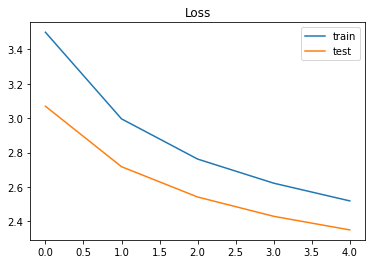

In [37]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

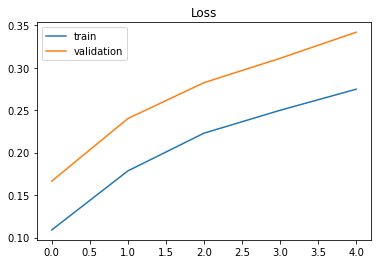

In [38]:
plt.title('Loss')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show();

In [39]:
model.predict(test_data_x[54:55],batch_size=None,verbose=0,steps=None)

array([[1.7869569e-01, 2.7105965e-02, 4.1733423e-04, 1.2713603e-02,
        2.1310424e-02, 4.0678728e-02, 1.5465653e-01, 7.4554272e-03,
        1.5416355e-01, 6.9410928e-02, 1.2284851e-01, 8.0368407e-02,
        5.9736770e-02, 3.5954542e-02, 2.3404625e-03, 5.5386769e-03,
        1.9871462e-04, 1.2890565e-04, 1.2647583e-04, 2.1068802e-06,
        9.5740252e-06, 4.6002697e-06, 9.0441701e-04, 2.4995843e-03,
        4.7141612e-06, 4.3039965e-03, 6.1789865e-04, 2.1512929e-04,
        1.5739668e-05, 1.3835455e-04, 1.2680970e-05, 8.8410679e-04,
        3.3174008e-05, 1.1168224e-06, 1.5562349e-05, 3.1239811e-06,
        1.0354976e-04, 1.3008536e-03, 4.1380958e-05, 1.8255636e-03,
        1.6090091e-03, 4.4722850e-03, 2.8884254e-04, 3.9457763e-03,
        4.8946831e-06, 5.5191185e-06, 1.0019164e-06, 7.7446765e-07,
        7.6046069e-07, 2.5634250e-07, 2.9463675e-07, 8.1049109e-07,
        6.5944981e-08, 1.2935877e-07, 9.9634883e-07, 5.8153713e-09,
        5.5157110e-09, 1.4674965e-04, 7.0212732e

In [40]:
test_data_y[54:55]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [79]:
9.78449225e-06

9.78449225e-06

In [17]:
#check for overfitting by test loss
model.fit(test_data_x, test_data_y, epochs=5, batch_size=8)

Epoch 1/5
785/785 [==============================] - 4s 5ms/step - loss: 2.6505 - accuracy: 0.4440
Epoch 2/5
785/785 [==============================] - 4s 5ms/step - loss: 1.8762 - accuracy: 0.6271
Epoch 3/5
785/785 [==============================] - 4s 5ms/step - loss: 1.5846 - accuracy: 0.7139
Epoch 4/5
785/785 [==============================] - 4s 5ms/step - loss: 1.4104 - accuracy: 0.7685
Epoch 5/5
785/785 [==============================] - 4s 5ms/step - loss: 1.2931 - accuracy: 0.8089


some statistics about the data

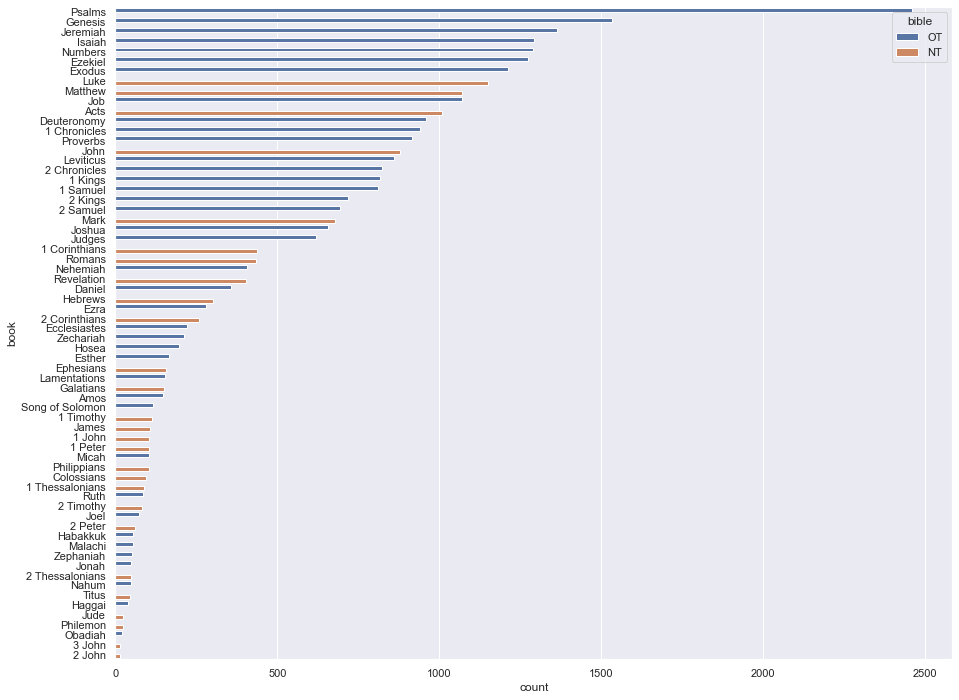

In [29]:
#examining distributions over books and bible
import seaborn as sns
sns.set_style("darkgrid")
sns.set()
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,12)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

OT_books = ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges',

            'Ruth', '1 Samuel', '2 Samuel', '1 Kings', '2 Kings', '1 Chronicles', '2 Chronicles',

            'Ezra', 'Nehemiah', 'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes',

            'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel', 'Daniel',

            'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah', 'Nahum', 'Habakkuk',

            'Zephaniah', 'Haggai',    'Zechariah',    'Malachi']

NT_books = ['Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans', '1 Corinthians',

            '2 Corinthians', 'Galatians', 'Ephesians', 'Philippians', 'Colossians',

            '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy', 'Titus', 'Philemon',

            'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude',

            'Revelation']

def book_to_bible(x):
    if x in OT_books:
        return 'OT'
    elif x in NT_books:
        return 'NT'
    else:
        return -1
    
# data = data.drop(['citation'], axis = 1)
data['bible'] = data.book.apply(book_to_bible)
data.bible.value_counts(normalize=True)


ax = sns.countplot(y="book", 
                   hue="bible", 
                   data=data, 
                   order=data.book.value_counts().index)

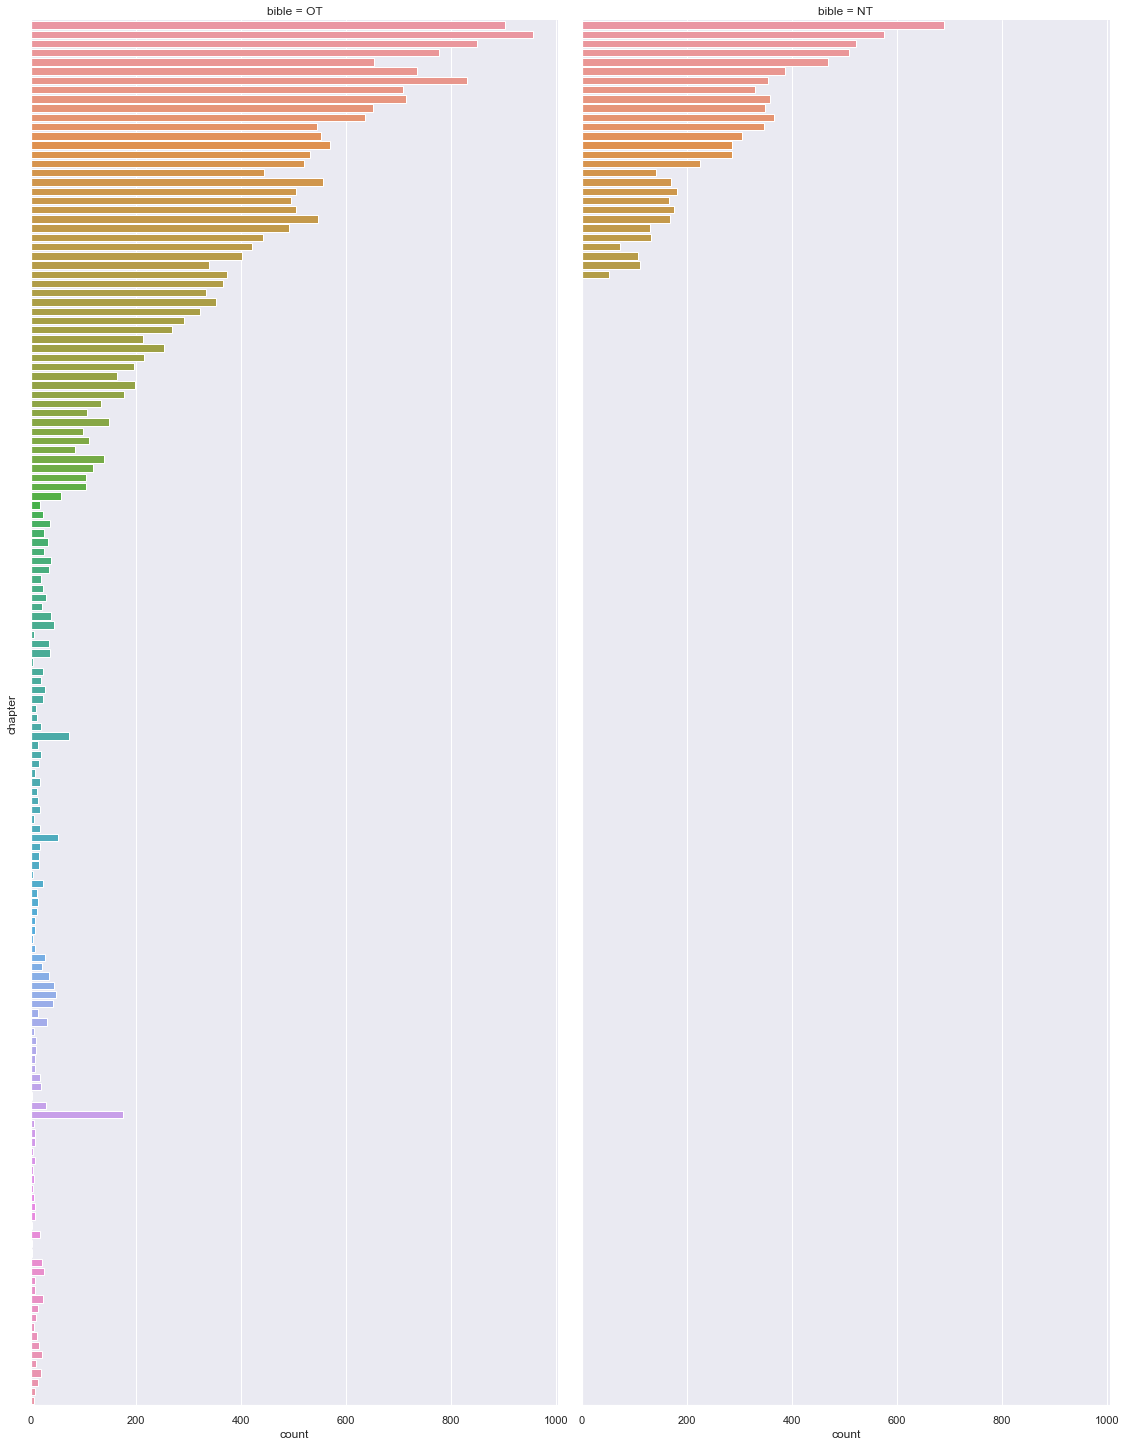

In [27]:
#distribution of chapter by bibles
ax = sns.catplot(y="chapter", 
                   col="bible", 
                   data=data,
                   kind="count",
                   height=20, aspect=.4)
for x in ax.axes.flat:
    labels = x.get_yticklabels()
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i] = '' 
    x.set_yticklabels(labels) 

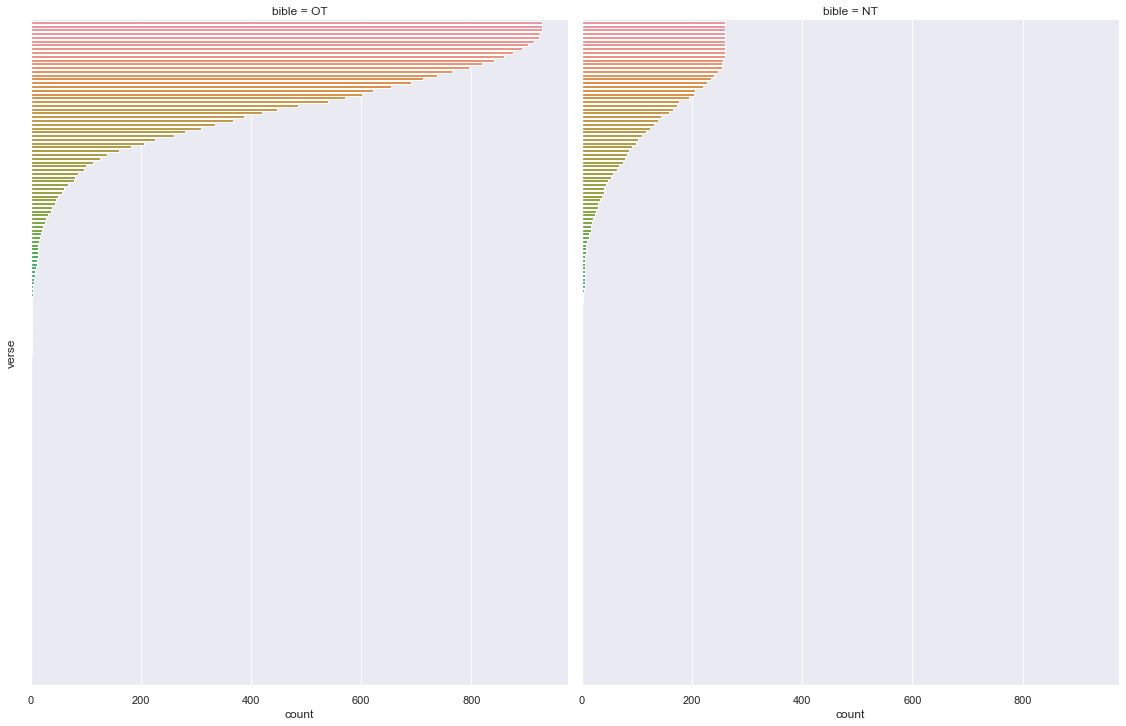

In [20]:
#distribution of verses by bibles
ax = sns.factorplot(y="verse", 
                   col="bible", 
                   data=data,
                   kind="count",
                   size=10, aspect=.8)
for x in ax.axes.flat:
    labels = x.get_yticklabels() 
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i] = '' 
    x.set_yticklabels(labels) 

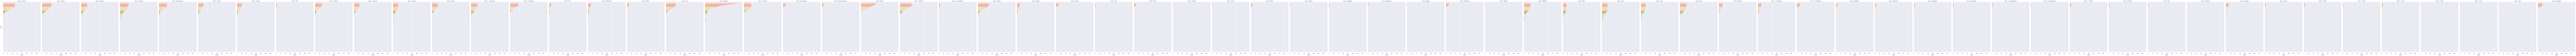

In [28]:
#distribution of verses by book
ax = sns.factorplot(y="verse", 
                   col="book", 
                   data=data,
                   kind="count",
                   size=8, aspect=.7)
for x in ax.axes.flat:
    labels = x.get_yticklabels() 
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i] = '' 
    x.set_yticklabels(labels) 